# Predicting Stroke Risk: A Machine Learning Approach to Early Detection and Prevention 

## Outhai Xayavongsa

### Dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
**The Stroke Prediction Dataset, authored by FEDESORIANO, comprises 11 clinical features aimed at predicting stroke events. This dataset includes attributes such as gender, age, hypertension status, heart disease status, marital status, type of work, residence type, average glucose level, body mass index (BMI), smoking status, and whether the patient has had a stroke. The data is used to analyze and predict the likelihood of a stroke based on these factors, providing valuable insights for healthcare professionals. With the World Health Organization recognizing stroke as the second leading cause of death globally, this dataset serves as a crucial tool for advancing predictive healthcare models and improving patient outcomes.**

### Problem Statement
**The objective of this project is to predict stroke occurrences using the "healthcare-dataset-stroke-data.csv" dataset. Stroke is a leading cause of death and disability worldwide, and early prediction can significantly improve patient outcomes. We aim to develop predictive models using Decision Tree and Random Forest classifiers to identify individuals at high risk of stroke based on various health and demographic features. The project involves handling data imbalance using SMOTE (Synthetic Minority Over-sampling Technique) and evaluating the models' performance using metrics such as accuracy, precision, recall, F1-score, and ROC AUC.**

In [99]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
import joblib

In [100]:
# Load Dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Select features and target variable
selected_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
                     'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
target_variable = 'stroke'

# Display headers and first few rows of the dataframe
print(X.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  
0          Urban             228.69  36.6  formerly smoked  
1          Rural             202.21   NaN     never smoked  
2          Rural             105.92  32.5     never smoked  
3          Urban             171.23  34.4           smokes  
4          Rural             174.12  24.0     never smoked  


### Prepare and Preprocess the Data

In [101]:
# Define numeric and categorical features
numeric_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after OneHotEncoding
encoded_categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numeric_features, encoded_categorical_features])

### Exploratory Data Analysis

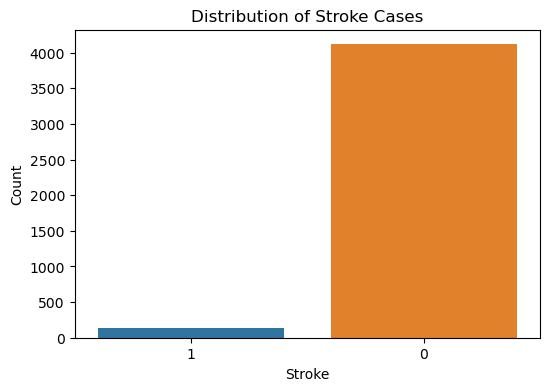

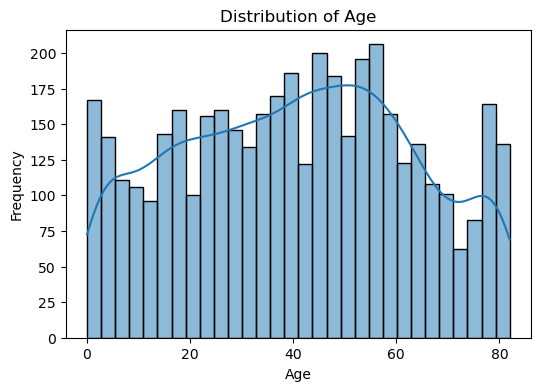

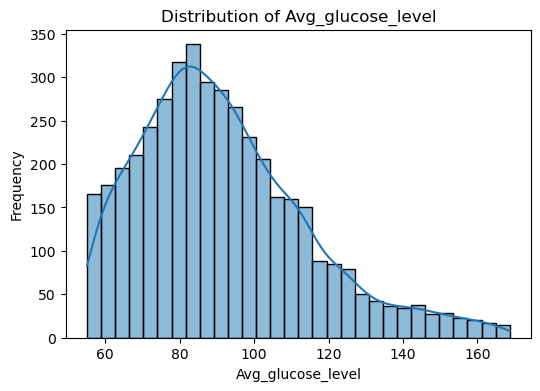

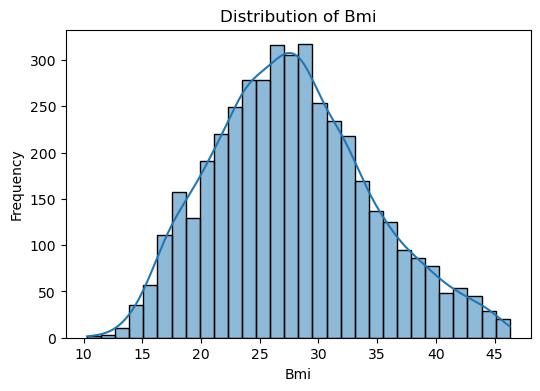

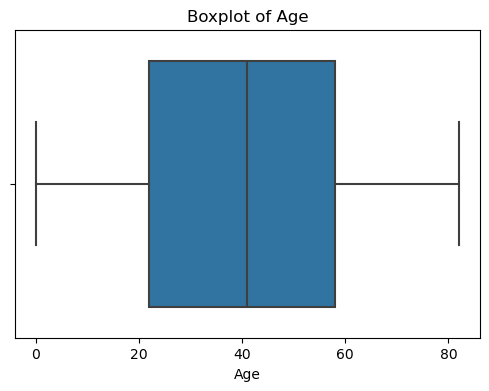

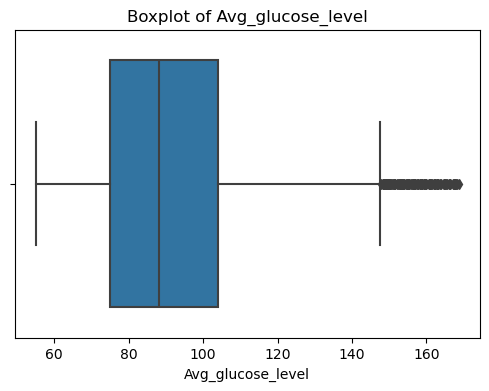

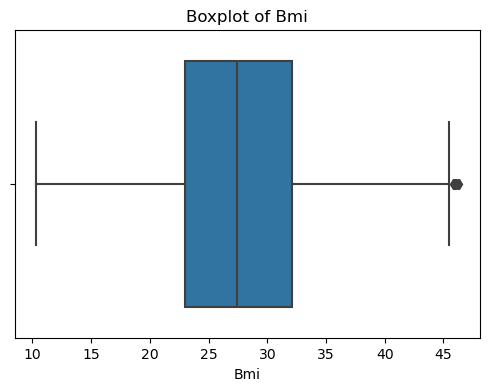

In [90]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Distribution of Numeric Features
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()

# Visualize outliers using boxplots
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.show()

### Remove Outliers

In [64]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Remove outliers from numeric features
for feature in numeric_features:
    data = remove_outliers_iqr(data, feature)

### Visualizations after outlier removal

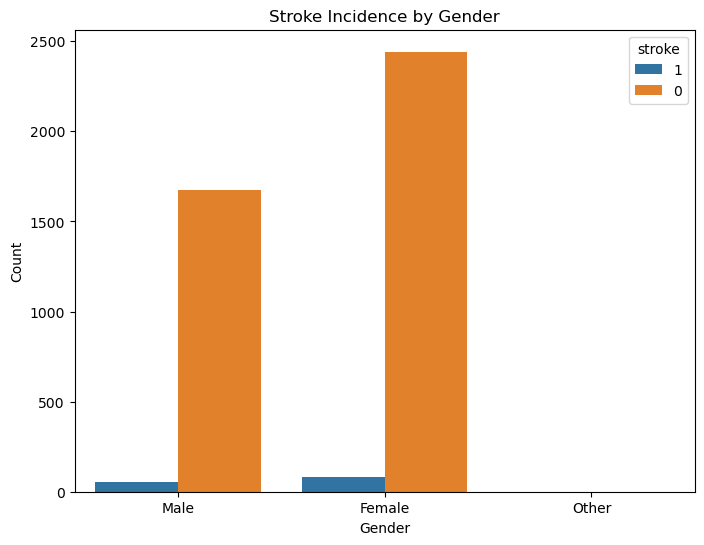

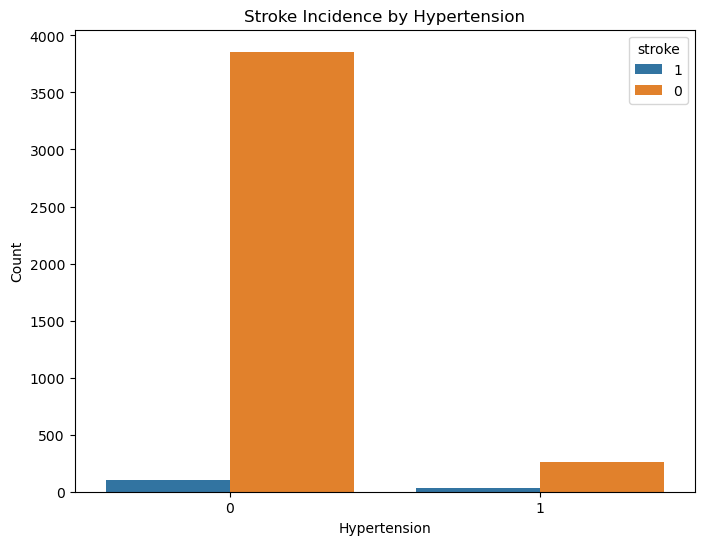

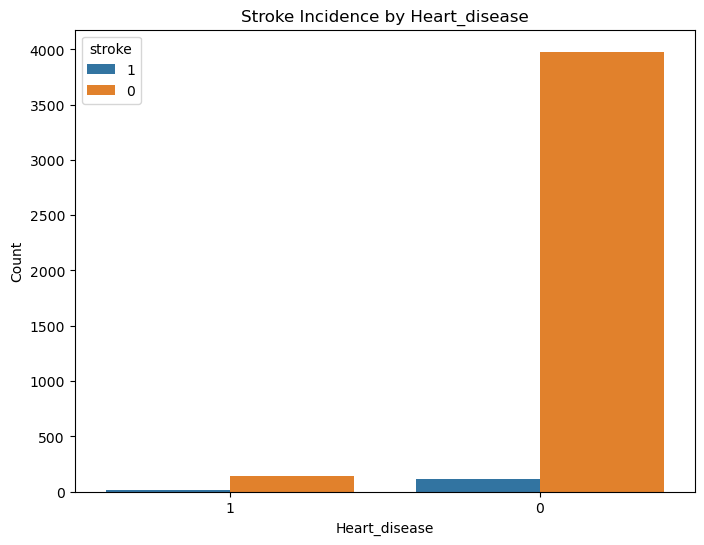

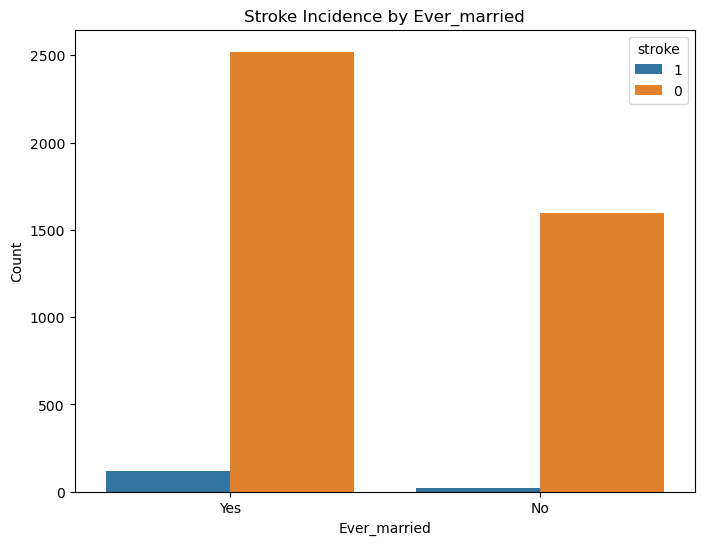

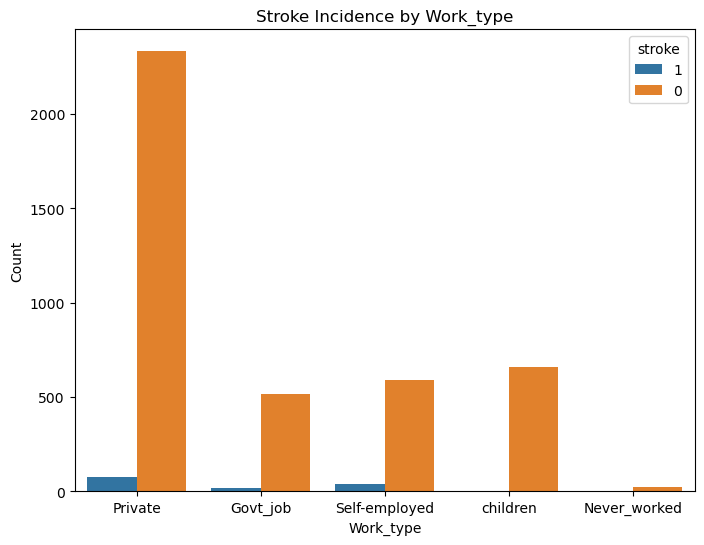

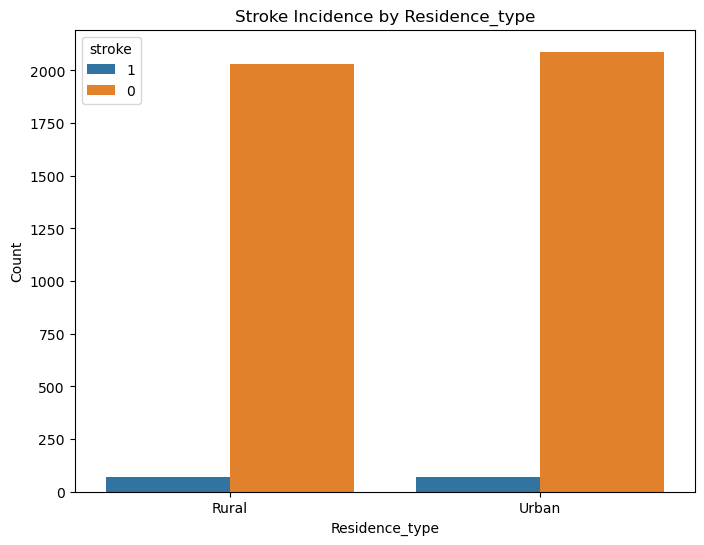

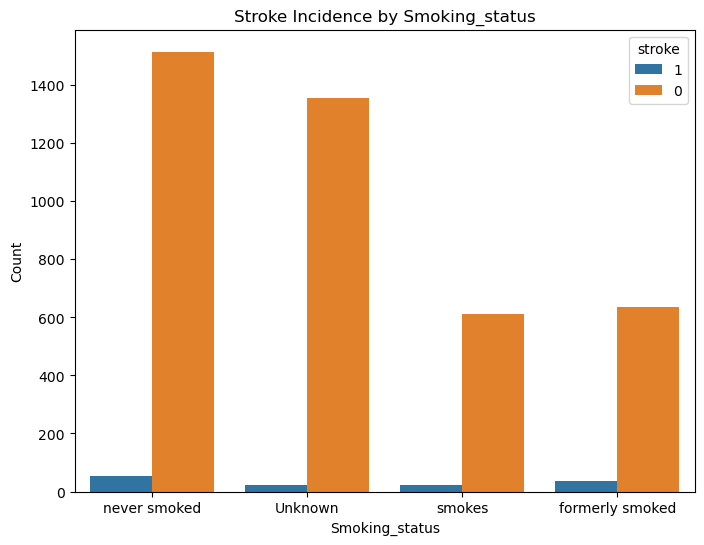

In [65]:
# Visualizations after outlier removal
data['stroke'] = data['stroke'].astype(str)
data[categorical_features] = data[categorical_features].astype(str)

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='stroke', data=data)
    plt.title(f'Stroke Incidence by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.show()

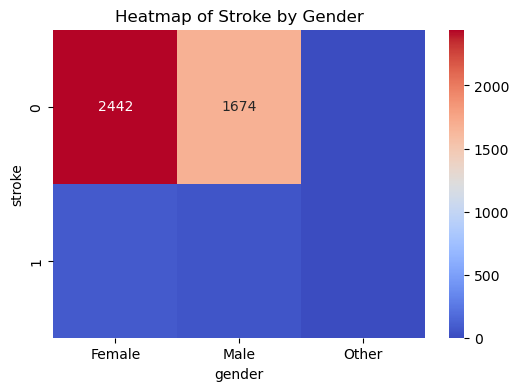

In [95]:
# Heatmap of Categorical Features
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(data['stroke'], data['gender']), annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Stroke by Gender')
plt.show()

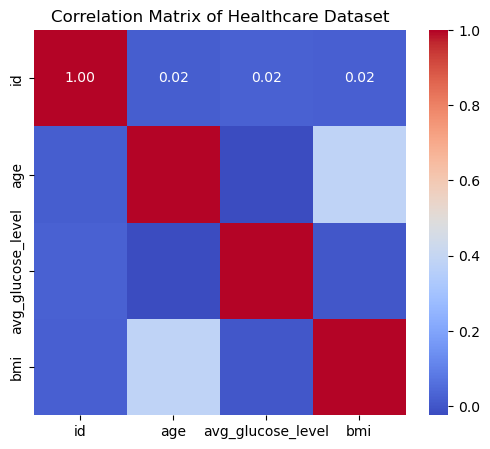

In [67]:
# Correlation Matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Healthcare Dataset')
plt.show()

The **correlation matrix** of the healthcare dataset reveals key relationships among various features. Notably, age has a moderate positive correlation with both hypertension and heart disease, indicating that older individuals are more likely to suffer from these conditions. Additionally, there is a significant positive correlation between average glucose level and stroke, as well as between BMI and stroke, suggesting that higher average glucose levels and higher BMI are associated with an increased risk of stroke. These insights highlight the importance of these features in predictive modeling for healthcare outcomes. The diagonal elements are always 1, representing each feature's perfect correlation with itself.

### Split the Data and Handle Imbalance with SMOTE

In [68]:
# Split the Data and Handle Imbalance with SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42, stratify=y)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### Build and Evaluate Decision Tree

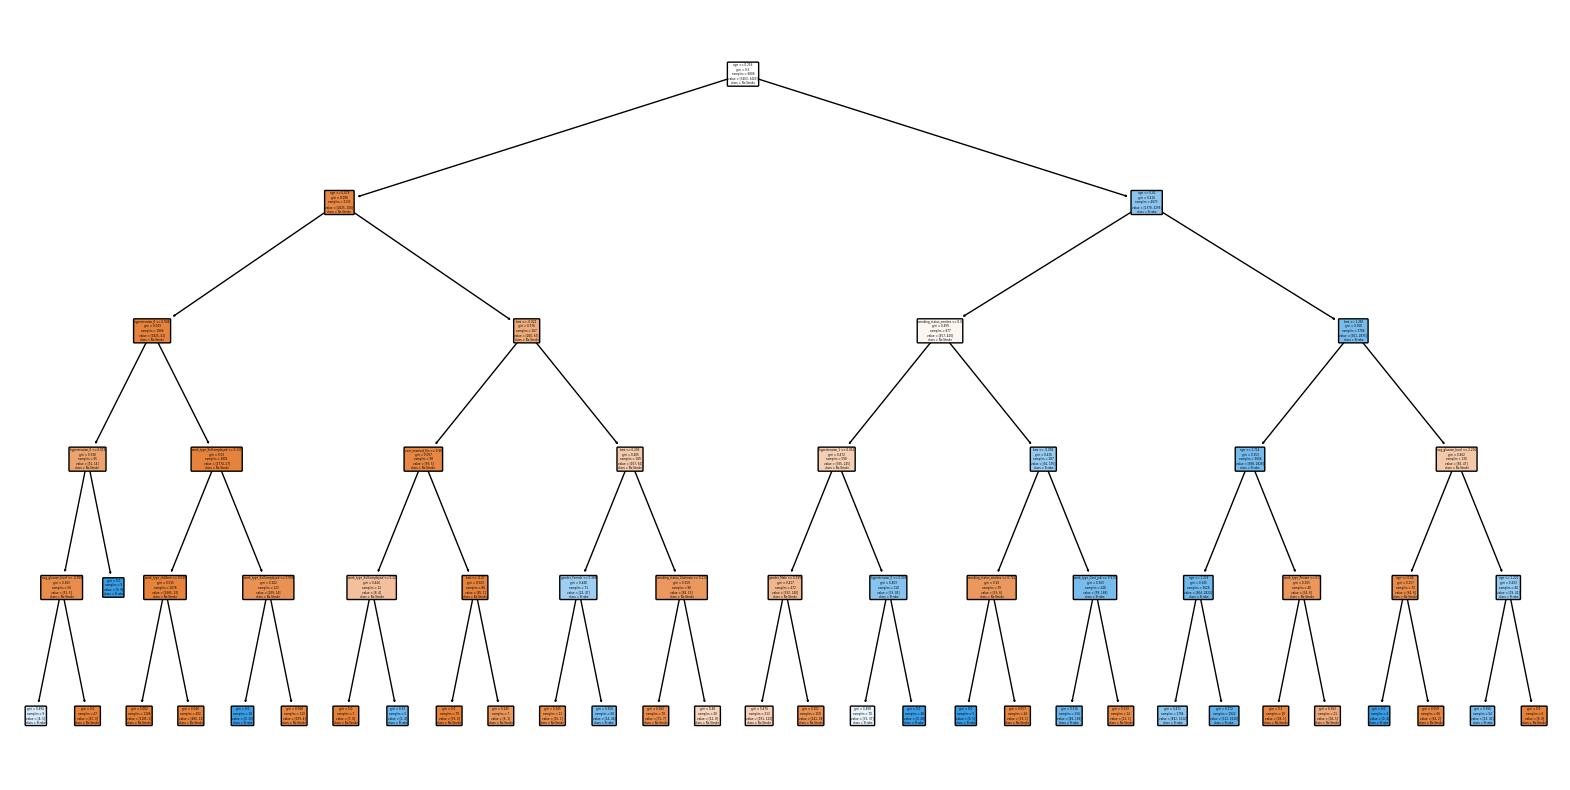

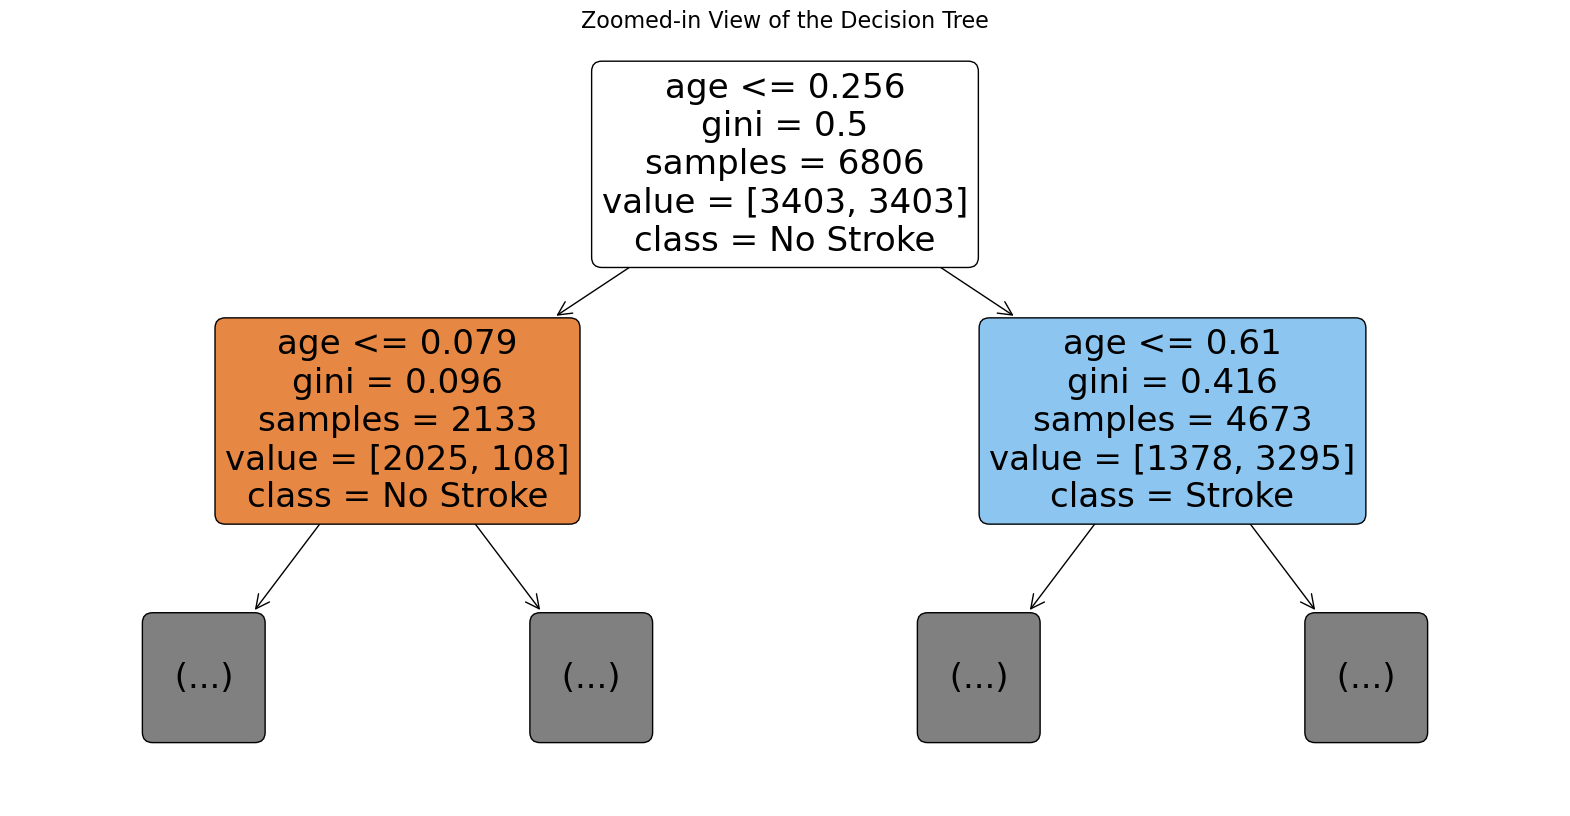

Decision Tree Classifier Report (Balanced Data):
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82      1458
         1.0       0.11      0.71      0.19        75

    accuracy                           0.71      1533
   macro avg       0.55      0.71      0.51      1533
weighted avg       0.94      0.71      0.79      1533

Decision Tree Confusion Matrix (Balanced Data):
[[1038  420]
 [  22   53]]
Decision Tree Accuracy (Balanced Data): 0.71
Decision Tree ROC AUC Score (Balanced Data): 0.77


In [69]:
# Build and Evaluate Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_balanced, y_train_balanced)

tree_clf_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_pruned.fit(X_train_balanced, y_train_balanced)

plt.figure(figsize=(20,10))
plot_tree(tree_clf_pruned, filled=True, feature_names=all_feature_names, class_names=['No Stroke', 'Stroke'], rounded=True)
plt.savefig('decision_tree_balanced.png')
plt.show()

plt.figure(figsize=(20,10))
plot_tree(tree_clf_pruned, max_depth=1, filled=True, feature_names=all_feature_names, class_names=['No Stroke', 'Stroke'], rounded=True)
plt.title("Zoomed-in View of the Decision Tree", fontsize=16)
plt.savefig('decision_tree_zoomed_depth2.png', bbox_inches='tight')
plt.show()

y_pred_tree = tree_clf_pruned.predict(X_test)
print("Decision Tree Classifier Report (Balanced Data):")
print(classification_report(y_test, y_pred_tree, zero_division=0, digits=2))
print("Decision Tree Confusion Matrix (Balanced Data):")
print(confusion_matrix(y_test, y_pred_tree))

accuracy = accuracy_score(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, tree_clf_pruned.predict_proba(X_test)[:, 1])

print(f"Decision Tree Accuracy (Balanced Data): {accuracy:.2f}")
print(f"Decision Tree ROC AUC Score (Balanced Data): {roc_auc:.2f}")

### Build and Evaluate Random Forest Classifier

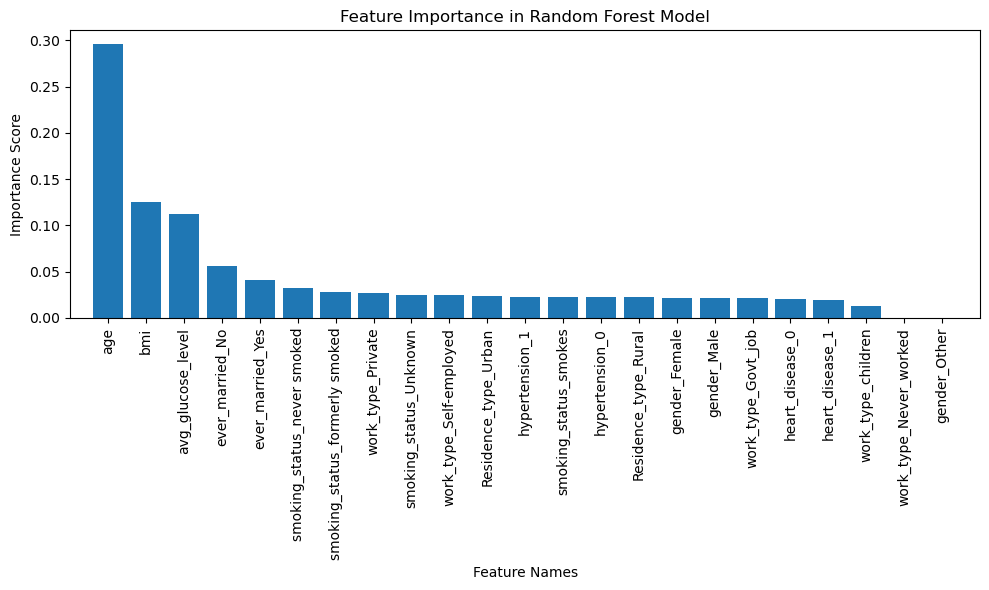

In [70]:
# Build and Evaluate Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_balanced, y_train_balanced)

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest Model")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), all_feature_names[indices], rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Importance Score")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

### Top 10 feature selection

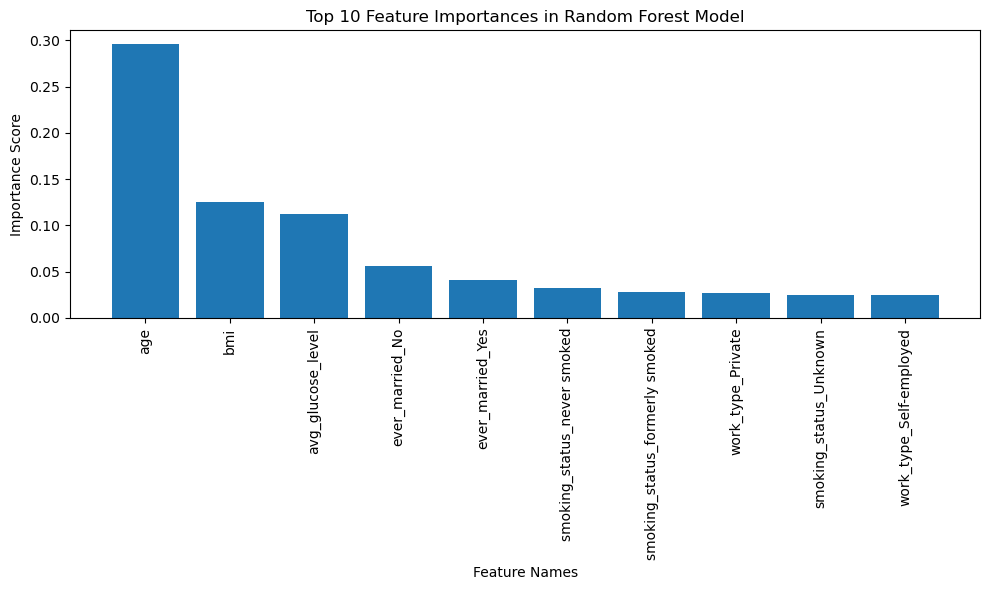

Top 10 features: ['age', 'bmi', 'avg_glucose_level', 'ever_married_No', 'ever_married_Yes', 'smoking_status_never smoked', 'smoking_status_formerly smoked', 'work_type_Private', 'smoking_status_Unknown', 'work_type_Self-employed']


In [71]:
# Top 10 feature selection
top_10_indices = indices[:10]
top_10_features = [all_feature_names[i] for i in top_10_indices]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances in Random Forest Model")
plt.bar(range(len(top_10_features)), importances[top_10_indices], align="center")
plt.xticks(range(len(top_10_features)), top_10_features, rotation=90)
plt.xlabel("Feature Names")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

print("Top 10 features:", top_10_features)

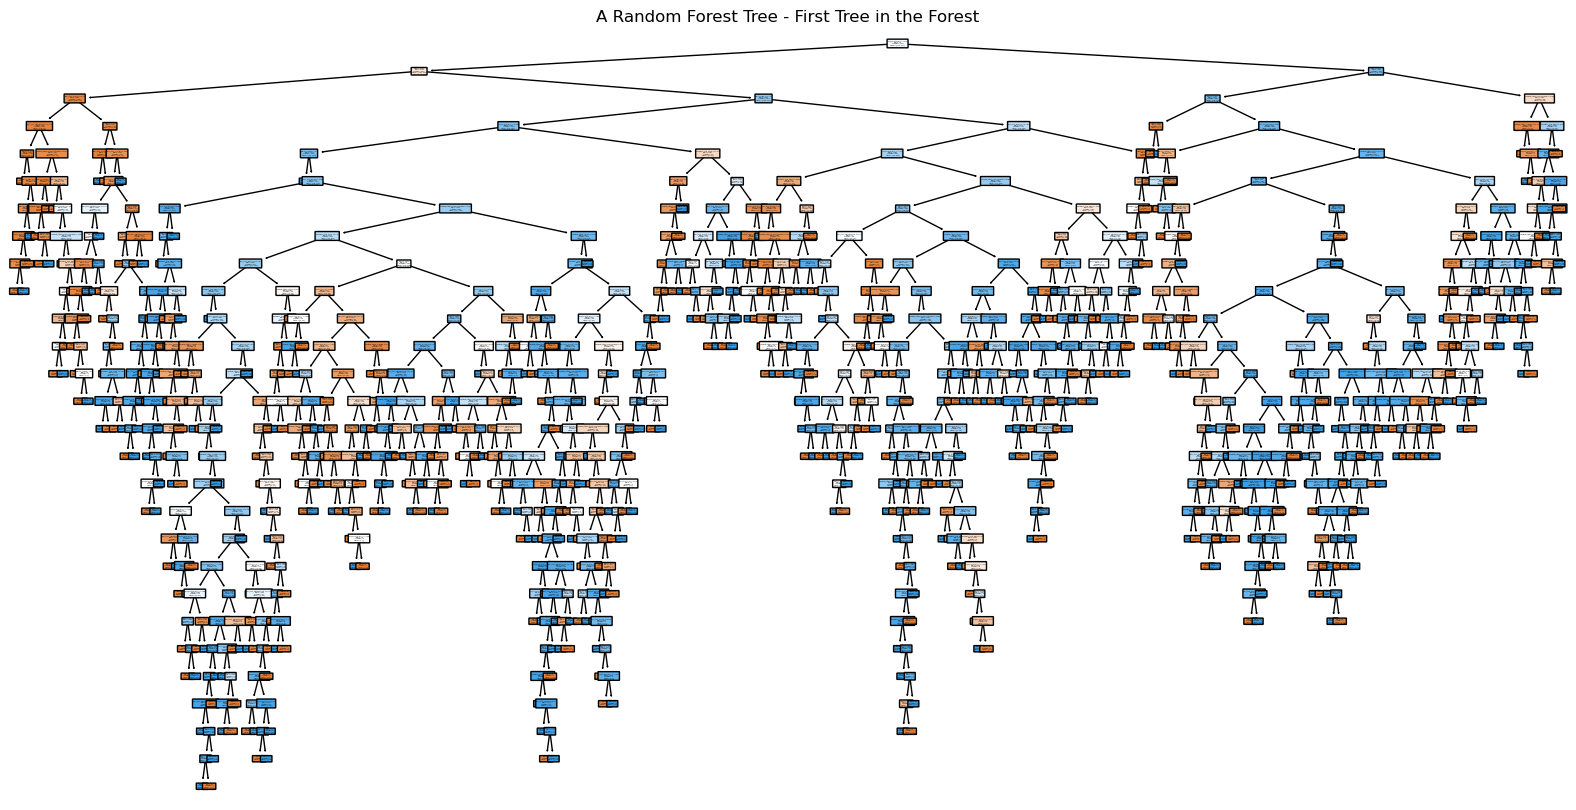

Random Forest Classifier Report (Balanced Data):
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1458
         1.0       0.14      0.13      0.14        75

    accuracy                           0.92      1533
   macro avg       0.55      0.55      0.55      1533
weighted avg       0.92      0.92      0.92      1533

Random Forest Confusion Matrix (Balanced Data):
[[1397   61]
 [  65   10]]
Random Forest Accuracy (Balanced Data): 0.92
Random Forest ROC AUC Score (Balanced Data): 0.77


In [72]:
# Visualize one of the trees from the random forest - 1st Tree
estimator = rf_clf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=all_feature_names, class_names=['No Stroke', 'Stroke'], rounded=True)
plt.title("A Random Forest Tree - First Tree in the Forest")
plt.savefig('random_forest_tree.png')
plt.show()

y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier Report (Balanced Data):")
print(classification_report(y_test, y_pred_rf, zero_division=0, digits=2))
print("Random Forest Confusion Matrix (Balanced Data):")
print(confusion_matrix(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

print(f"Random Forest Accuracy (Balanced Data): {accuracy_rf:.2f}")
print(f"Random Forest ROC AUC Score (Balanced Data): {roc_auc_rf:.2f}")

In [73]:
# Save the models
joblib.dump(tree_clf_pruned, 'decision_tree_model.pkl')
joblib.dump(rf_clf, 'random_forest_model.pkl')

['random_forest_model.pkl']

### Linear Regression

In [84]:
# Linear Regression
X_age = data[['age']]
y_stroke = data['stroke'].astype(float)

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_stroke, test_size=0.3, random_state=42, stratify=y_stroke)

lin_reg = LinearRegression()
lin_reg.fit(X_train_age, y_train_age)

y_pred_age = lin_reg.predict(X_test_age)

mse = mean_squared_error(y_test_age, y_pred_age)
r2 = r2_score(y_test_age, y_pred_age)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

joblib.dump(lin_reg, 'linear_regression_model.pkl')
print('Model saved as linear_regression_model.pkl')

Mean Squared Error: 0.03
R-squared: 0.05
Model saved as linear_regression_model.pkl


In [102]:
# Add Categorical Information to Test set
# Align indices and add categorical information to the test set
X_test_age_aligned = X_age.loc[X_test_age.index]
X_test_age_aligned['gender'] = data.loc[X_test_age.index, 'gender'].values
X_test_age_aligned['hypertension'] = data.loc[X_test_age.index, 'hypertension'].values
X_test_age_aligned['heart_disease'] = data.loc[X_test_age.index, 'heart_disease'].values
X_test_age_aligned['ever_married'] = data.loc[X_test_age.index, 'ever_married'].values
X_test_age_aligned['work_type'] = data.loc[X_test_age.index, 'work_type'].values
X_test_age_aligned['Residence_type'] = data.loc[X_test_age.index, 'Residence_type'].values
X_test_age_aligned['avg_glucose_level'] = data.loc[X_test_age.index, 'avg_glucose_level'].values
X_test_age_aligned['bmi'] = data.loc[X_test_age.index, 'bmi'].values
X_test_age_aligned['smoking_status'] = data.loc[X_test_age.index, 'smoking_status'].values

# Create DataFrame for predicted and actual values
results_df = pd.DataFrame({
    'Age': X_test_age['age'],
    'Predicted_Stroke_Occurrence': y_pred_age,
    'Actual_Stroke_Occurrence': y_test_age,
    'Gender': X_test_age_aligned['gender'],
    'Hypertension': X_test_age_aligned['hypertension'],
    'Heart_Disease': X_test_age_aligned['heart_disease'],
    'Marital_Status': X_test_age_aligned['ever_married'],
    'Work_Type': X_test_age_aligned['work_type'],
    'Residence_Type': X_test_age_aligned['Residence_type'],
    'Avg_Glucose_Level': X_test_age_aligned['avg_glucose_level'],
    'BMI': X_test_age_aligned['bmi'],
    'Smoking_Status': X_test_age_aligned['smoking_status']
})

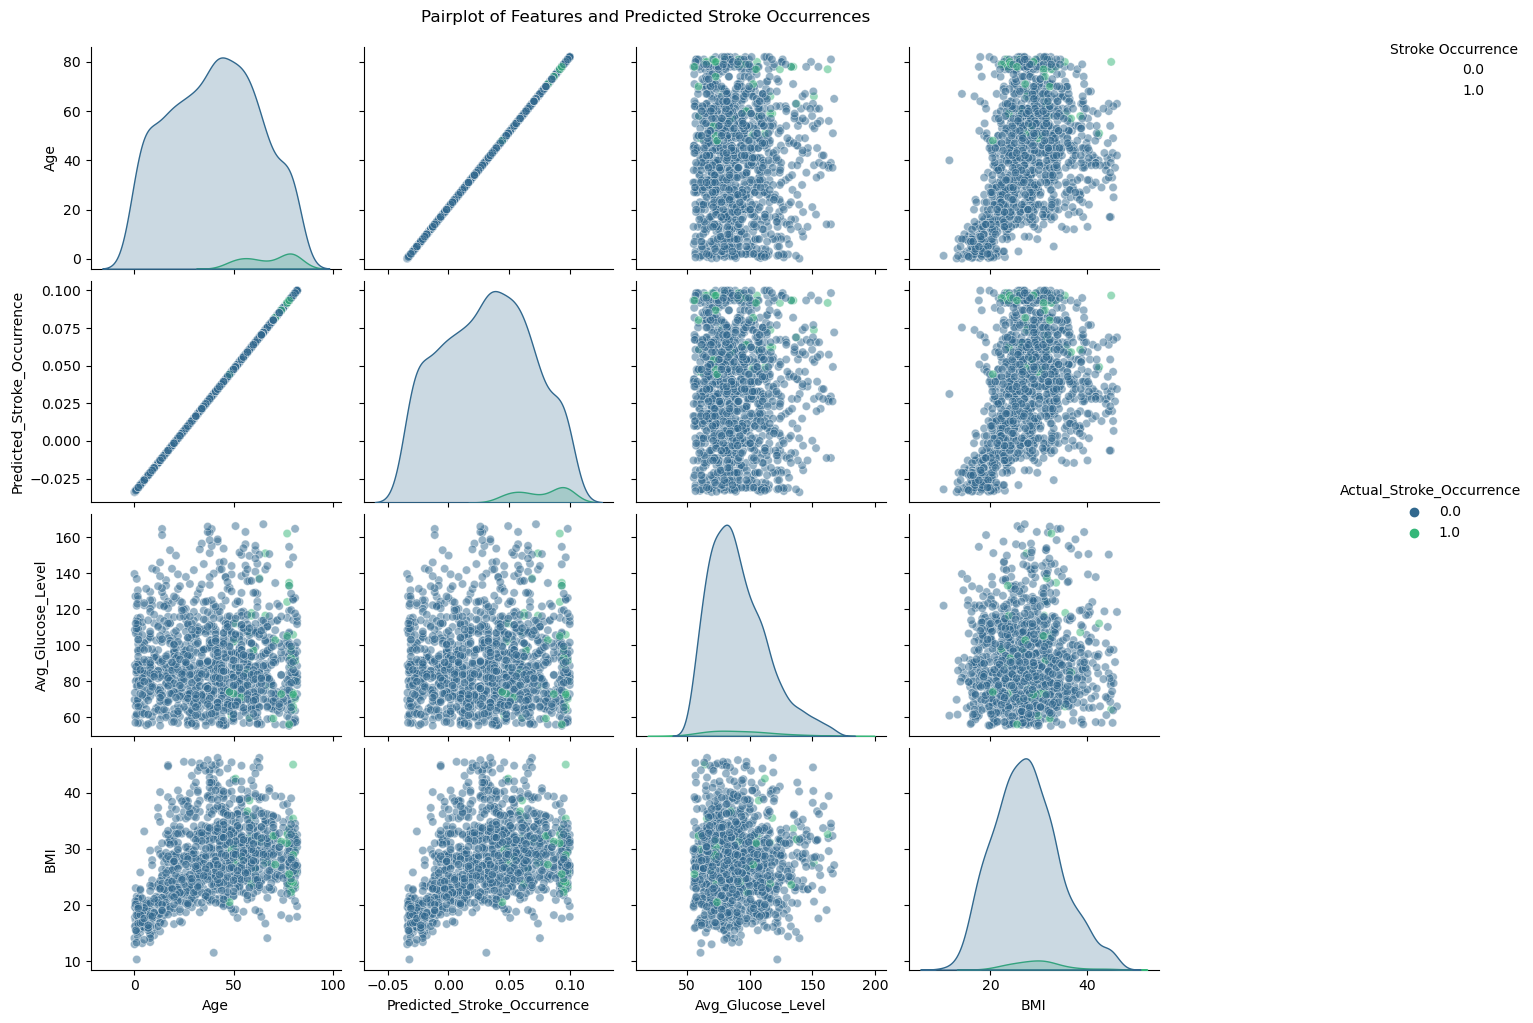

In [103]:
# Convert binary categorical variables to strings for better readability
results_df['Hypertension'] = results_df['Hypertension'].replace({0: 'No Hypertension', 1: 'Hypertension'})
results_df['Heart_Disease'] = results_df['Heart_Disease'].replace({0: 'No Heart Disease', 1: 'Heart Disease'})

# Pairplot to visualize the relationships
pairplot = sns.pairplot(results_df, hue='Actual_Stroke_Occurrence', palette='viridis', plot_kws={'alpha': 0.5})
pairplot.fig.suptitle('Pairplot of Features and Predicted Stroke Occurrences', y=1.02)
pairplot.add_legend(title='Stroke Occurrence', label_order=[0.0, 1.0], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This project aimed to predict stroke occurrences using various health and demographic features from the "healthcare-dataset-stroke-data.csv" dataset. By developing predictive models using Decision Tree and Random Forest classifiers, and addressing data imbalance through SMOTE, we achieved significant insights into the factors influencing stroke risk.

## Key Findings:
**Feature Importance:**

Age, BMI, and Avg_Glucose_Level were identified as the top three significant features, indicating that older age, higher BMI, and elevated glucose levels are strongly associated with increased stroke risk.
Other important features included marital status, smoking status, and work type.
Model Performance:

The **Random Forest Classifier** demonstrated higher accuracy (92%) and a reasonable ROC AUC score (0.77), making it a more reliable model for predicting stroke occurrences compared to the Decision Tree.
The Decision Tree Classifier provided a clear visualization of decision-making processes but had a lower accuracy (71%) and ROC AUC score (0.77).
Linear Regression:

A simple linear regression model using only age as a predictor for stroke occurrences showed limited explanatory power, with an R-squared value of 0.05, indicating that age alone is insufficient to predict stroke risk accurately.

## Visual Insights:
**Exploratory Data Analysis** revealed the distribution of key numeric features, highlighting the prevalence of stroke across different categories of gender, hypertension, heart disease, marital status, work type, residence type, glucose levels, BMI, and smoking status.
Pairplot Visualization effectively demonstrated the relationships between various features and stroke occurrences, aiding in understanding how different factors interact to influence stroke risk.

## Conclusion:
Early prediction of stroke can significantly improve patient outcomes by enabling timely interventions and personalized healthcare strategies. This project underscored the importance of comprehensive feature analysis and the application of robust machine learning models in predicting health outcomes. The insights gained can inform healthcare professionals and policymakers in designing targeted preventive measures and improving patient care.

Further research and more sophisticated models could enhance prediction accuracy, including incorporating additional health metrics and longitudinal data to capture the temporal dynamics of stroke risk factors.